original document of single-redshift sampling: https://colab.research.google.com/drive/1pK9xwy4FDU39mkhVPtj0yXC1lBJZll6U
original document of multi-redshift sampling: https://colab.research.google.com/drive/1k9C9HvyX9CwArDmRoK4Ypz_FdeTC7rnt

Packages:
1. colossus, https://bdiemer.bitbucket.io/colossus/lss_mass_function.html#lss.mass_function.massFunction
2. scipy interpolation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
3. scipy integration: https://docs.scipy.org/doc/scipy/tutorial/integrate.html
4. emcee for MCMC: https://emcee.readthedocs.io/en/stable/user/sampler/
5. redshift distribution (used skewed gaussian to imitate): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html#scipy.stats.skewnorm

Hanzhi Tan


In [45]:
import mass_sampling_script as ms

Single-redshift


Deleted outdated persistence file, no further action needed.
 Done with burn-in:  19.304912090301514
 Done with MCMC:  4.040727138519287


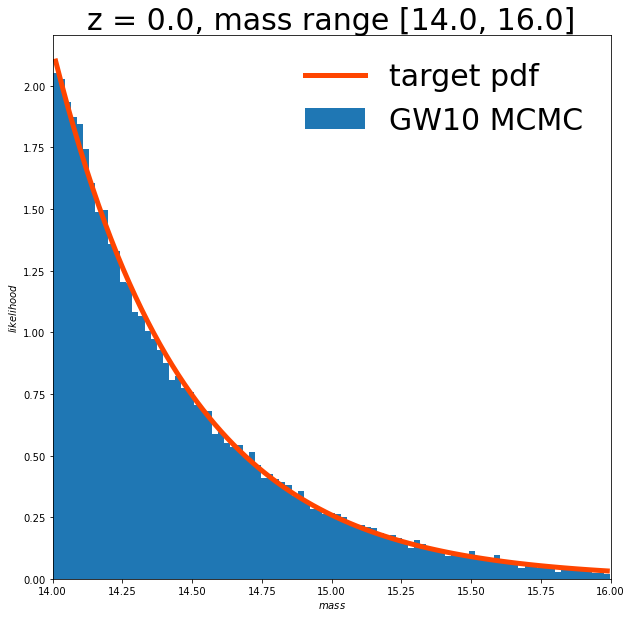

In [61]:
mass_range = (14.0, 16.0)
test_func, mass_chain = ms.mass_sampling(mass_range)
ms.plot_pdf(mass_chain, "z = 0.0, mass range [14.0, 16.0]", func=test_func, xlims=mass_range, ylog=False, bins='auto', label='GW10 MCMC', figsize = 10)

multi-redshift


In [46]:
tot_num, filepath, clusters = ms.mul_redshift_mass_sampling(rs_dist = "skewnorm", rs_range = (0.0, 1.5), mass_range = (14.0, 16.0), mdef = '200c', model = 'bocquet16', sample_num = 1000, store = True)


you divide redshift range (0.0, 1.5) into 25 chops, it will take about 9.375 minutes to complete.
starting sampling with redshift: 0.2697, sample_num : 20
Deleted outdated persistence file, no further action needed.
 Done with burn-in:  19.44021511077881
 Done with MCMC:  0.002079010009765625
starting sampling with redshift: 0.2865, sample_num : 30
Deleted outdated persistence file, no further action needed.
 Done with burn-in:  19.23433208465576
 Done with MCMC:  0.0032668113708496094
starting sampling with redshift: 0.3034, sample_num : 30
Deleted outdated persistence file, no further action needed.
 Done with burn-in:  18.593257904052734
 Done with MCMC:  0.0017600059509277344
starting sampling with redshift: 0.3202, sample_num : 50
Deleted outdated persistence file, no further action needed.
 Done with burn-in:  18.09331202507019
 Done with MCMC:  0.0030007362365722656
starting sampling with redshift: 0.3371, sample_num : 30
Deleted outdated persistence file, no further action need

In [60]:
#use dataframe directly
clusters_arr = clusters.to_numpy()
print(" [mass           redshift]")
print(clusters_arr[:10])

 [mass           redshift]
[[3.71432286e+14 2.69700000e-01]
 [1.72265723e+14 2.69700000e-01]
 [1.53326276e+14 2.69700000e-01]
 [3.06497421e+14 2.69700000e-01]
 [1.15509881e+15 2.69700000e-01]
 [4.52443457e+15 2.69700000e-01]
 [1.15295316e+14 2.69700000e-01]
 [1.72389538e+15 2.69700000e-01]
 [2.86355868e+15 2.69700000e-01]
 [2.30347211e+14 2.69700000e-01]]


In [51]:
#use csv file
csv_clusters = pd.read_csv(filepath)
print(csv_clusters)
csv_clusters_arr = clusters.to_numpy() #->transfer to numpy arr

         mass_arr  redshift
0    3.714323e+14    0.2697
1    1.722657e+14    0.2697
2    1.533263e+14    0.2697
3    3.064974e+14    0.2697
4    1.155099e+15    0.2697
..            ...       ...
715  1.460979e+14    0.7416
716  2.026961e+14    0.7416
717  1.178130e+14    0.7416
718  3.426295e+14    0.7416
719  1.059727e+14    0.7416

[720 rows x 2 columns]
